# Jupyter Notebook to Analyize and Visualize BSR Screen CSV data


# 1. Importing Packages Required (No input required, just run)

In [138]:
import pandas as pd #<- package used to import and organize data
import numpy as np #<- package used to import and organize data
import seaborn as sns #<- package used to plot graphs
from matplotlib import pyplot as plt #<- package used to plot graphs
import os #<- package used to work with system filepaths
from ipywidgets import widgets #<- widget tool to generate button
from IPython.display import display #<- displays button
# from tkinter import Tk, filedialog #<- Tkinter is a GUI package
from tqdm.notebook import tqdm
from ipyfilechooser import FileChooser
# import dask.dataframe as dd
import pingouin as pg
import random
from pingouin import ttest
from scipy.stats import ttest_ind
pd.set_option('display.max_columns', 50)
print("done step 1")

done step 1


# 2. Pick filepath (just run and click button)

Run the following cell and clicke the button 'Select Folder' to pick a filepath.

## Important: Later on, this script uses the total file path for each file to import and group data. That means if your folder has whatever your strain is named, the script will not work.

(ex. if your folder has "N2" in it this script sees all files inside this folder as having the "N2" search key)

## An easy fix is to just rename your folder to something else (make your strains lower-case, or just have the date)

In [2]:
starting_directory='/Users/Joseph/Desktop/'
chooser=FileChooser(starting_directory)
display(chooser)

FileChooser(path='/Users/Joseph/Desktop', filename='', title='', show_hidden=False, select_desc='Select', chan…

In [3]:
folder_path=chooser.selected_path
print(folder_path)

/Volumes/JosephBSR/PDScreen_BSR


In [64]:
BSR_Data = pd.read_csv(chooser.selected).drop(columns=['Unnamed: 0'])

In [65]:
print(BSR_Data)

                          Group          Genotype Treatment      Gene  \
0      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)   OffFood  C29E4.10   
1      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)   OffFood  C29E4.10   
2      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)   OffFood  C29E4.10   
3      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)   OffFood  C29E4.10   
4      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)   OffFood  C29E4.10   
...                         ...               ...       ...       ...   
52807     vps-35(ok1880)_OnFood    vps-35(ok1880)    OnFood    vps-35   
52808     vps-35(ok1880)_OnFood    vps-35(ok1880)    OnFood    vps-35   
52809     vps-35(ok1880)_OnFood    vps-35(ok1880)    OnFood    vps-35   
52810     vps-35(ok1880)_OnFood    vps-35(ok1880)    OnFood    vps-35   
52811     vps-35(ok1880)_OnFood    vps-35(ok1880)    OnFood    vps-35   

       plate_id      date  worm  time_bin        time     speed          x  \
0         90842  20240815     2     362.0  36

In [66]:
BSR_Data['Allele'] = BSR_Data['Genotype'].str.split(pat='(', expand=True)[1]
BSR_Data['Allele'] = BSR_Data['Allele'].str.split(pat=')', expand=True)[0]
print(BSR_Data)

                          Group          Genotype Treatment      Gene  \
0      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)   OffFood  C29E4.10   
1      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)   OffFood  C29E4.10   
2      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)   OffFood  C29E4.10   
3      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)   OffFood  C29E4.10   
4      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)   OffFood  C29E4.10   
...                         ...               ...       ...       ...   
52807     vps-35(ok1880)_OnFood    vps-35(ok1880)    OnFood    vps-35   
52808     vps-35(ok1880)_OnFood    vps-35(ok1880)    OnFood    vps-35   
52809     vps-35(ok1880)_OnFood    vps-35(ok1880)    OnFood    vps-35   
52810     vps-35(ok1880)_OnFood    vps-35(ok1880)    OnFood    vps-35   
52811     vps-35(ok1880)_OnFood    vps-35(ok1880)    OnFood    vps-35   

       plate_id      date  worm  time_bin        time     speed          x  \
0         90842  20240815     2     362.0  36

In [67]:
BSR_Data['Allele'] = BSR_Data['Allele'].fillna('N2')

In [70]:
print(len(BSR_Data['Gene'].unique()))

99


## Just For Worm Speed:

### By Gene:

In [45]:
worm_avg_speed = BSR_Data[['Gene', 'Treatment', 'speed']]
avg_speed = worm_avg_speed.groupby(["Gene", 'Treatment'], as_index=False).mean()
print(avg_speed)
print("-"*50)
speed_diff = avg_speed.drop(columns=["Treatment"]).groupby("Gene", as_index=False).diff(periods=-1).dropna()
print(speed_diff)
print("-"*50)
speed_diff.insert(loc=0, column='Gene', value=avg_speed['Gene'])
speed_diff=speed_diff.reset_index(drop=True)
print(speed_diff)
print("-"*50)
# speed_diff=speed_diff.sort_values(by=["speed"])
# print(speed_diff)
print("-"*50)
print(speed_diff.iloc[3,1])
speed_diff['Score']=speed_diff['speed']-speed_diff.iloc[3,1]
print("-"*50)
print(speed_diff)
print("-"*50)
speed_diff=speed_diff.sort_values(by=["Score"])
print("-"*50)
print(speed_diff)
# speed_diff.to_csv("/Users/Joseph/Desktop/BSR_Screen_speed_diff.csv")

         Gene Treatment     speed
0    C29E4.10   OffFood  0.225740
1    C29E4.10    OnFood  0.140878
2     F53B2.5   OffFood  0.123559
3     F53B2.5    OnFood  0.053344
4    F54B11.5   OffFood  0.194966
..        ...       ...       ...
193    unc-57    OnFood  0.030208
194    unc-70   OffFood  0.074166
195    unc-70    OnFood  0.055663
196    vps-35   OffFood  0.075013
197    vps-35    OnFood  0.051642

[198 rows x 3 columns]
--------------------------------------------------
        speed
0    0.084863
2    0.070215
4    0.088286
6    0.088201
8    0.113898
..        ...
188  0.014218
190  0.015082
192 -0.008624
194  0.018503
196  0.023371

[99 rows x 1 columns]
--------------------------------------------------
        Gene     speed
0   C29E4.10  0.084863
1    F53B2.5  0.070215
2   F54B11.5  0.088286
3         N2  0.088201
4    R07G3.8  0.113898
..       ...       ...
94    unc-10  0.014218
95    unc-43  0.015082
96    unc-57 -0.008624
97    unc-70  0.018503
98    vps-35  0.023371

In [358]:
Gene_Orthology=pd.read_csv('/Users/Joseph/Desktop/BSR_Screen/Gene_Orthology.csv').drop(columns=['Unnamed: 0'])
Gene_Orthology=Gene_Orthology.rename(columns={"Gene":"Orthology", "Worm Gene":"Gene"})
print(Gene_Orthology)

         Orthology    Gene Human Gene Category
0      KCNS3•kvs-5   kvs-5      KCNS3     GWAS
1      LAMB2•lam-1   lam-1      LAMB2     GWAS
2        GBA•gba-4   gba-4        GBA     GWAS
3     MCCC1•mccc-1  mccc-1      MCCC1     GWAS
4    CAMK2D•unc-43  unc-43     CAMK2D     GWAS
..             ...     ...        ...      ...
119  PLA2G6•ipla-3  ipla-3     PLA2G6     PARK
120  KIF21B•klp-12  klp-12     KIF21B     GWAS
121   ZRANB3•csb-1   csb-1     ZRANB3     GWAS
122   SYNJ1•unc-26  unc-26      SYNJ1     PARK
123   GIGYF2•gyf-1   gyf-1     GIGYF2     PARK

[124 rows x 4 columns]


In [359]:
speed_diff_orthology=pd.merge(speed_diff,
                     Gene_Orthology,
                     on='Gene',
                     how='left')

speed_diff_orthology=speed_diff_orthology.rename(columns={"Gene":"Worm Gene", "Orthology":"Gene"})
print(speed_diff_orthology)
print("-"*50)
print(speed_diff_orthology[speed_diff_orthology['Gene'].isna()])

    Worm Gene     speed                  Gene    Human Gene  Category
0    C29E4.10  0.084863         GALC•C29E4.10          GALC      GWAS
1     F53B2.5  0.070215         KPNA1•F53B2.5         KPNA1      GWAS
2    F54B11.5  0.088286       RNF141•F54B11.5        RNF141      GWAS
3          N2  0.088201                 WT•N2            WT  POSITIVE
4     R07G3.8  0.113898  FAM49B\CYRIB•R07G3.8  FAM49B\CYRIB      GWAS
..        ...       ...                   ...           ...       ...
96     unc-10  0.014218          RIMS1•unc-10         RIMS1      GWAS
97     unc-43  0.015082         CAMK2D•unc-43        CAMK2D      GWAS
98     unc-57 -0.008624         SH3GL2•unc-57        SH3GL2      GWAS
99     unc-70  0.018503         SPTBN1•unc-70        SPTBN1      GWAS
100    vps-35  0.023371          VPS35•vps-35         VPS35      PARK

[101 rows x 5 columns]
--------------------------------------------------
Empty DataFrame
Columns: [Worm Gene, speed, Gene, Human Gene, Category]
Index: []


In [360]:
speed_diff_orthology=pd.merge(speed_diff,
                     Gene_Orthology,
                     on='Gene',
                     how='left')

speed_diff_orthology=speed_diff_orthology.rename(columns={"Gene":"Worm Gene", "Orthology":"Gene"})
print(speed_diff_orthology)
print("-"*50)
print(speed_diff_orthology[speed_diff_orthology['Gene'].isna()])

    Worm Gene     speed                  Gene    Human Gene  Category
0    C29E4.10  0.084863         GALC•C29E4.10          GALC      GWAS
1     F53B2.5  0.070215         KPNA1•F53B2.5         KPNA1      GWAS
2    F54B11.5  0.088286       RNF141•F54B11.5        RNF141      GWAS
3          N2  0.088201                 WT•N2            WT  POSITIVE
4     R07G3.8  0.113898  FAM49B\CYRIB•R07G3.8  FAM49B\CYRIB      GWAS
..        ...       ...                   ...           ...       ...
96     unc-10  0.014218          RIMS1•unc-10         RIMS1      GWAS
97     unc-43  0.015082         CAMK2D•unc-43        CAMK2D      GWAS
98     unc-57 -0.008624         SH3GL2•unc-57        SH3GL2      GWAS
99     unc-70  0.018503         SPTBN1•unc-70        SPTBN1      GWAS
100    vps-35  0.023371          VPS35•vps-35         VPS35      PARK

[101 rows x 5 columns]
--------------------------------------------------
Empty DataFrame
Columns: [Worm Gene, speed, Gene, Human Gene, Category]
Index: []


## Making the bar plot

<Figure size 640x480 with 0 Axes>

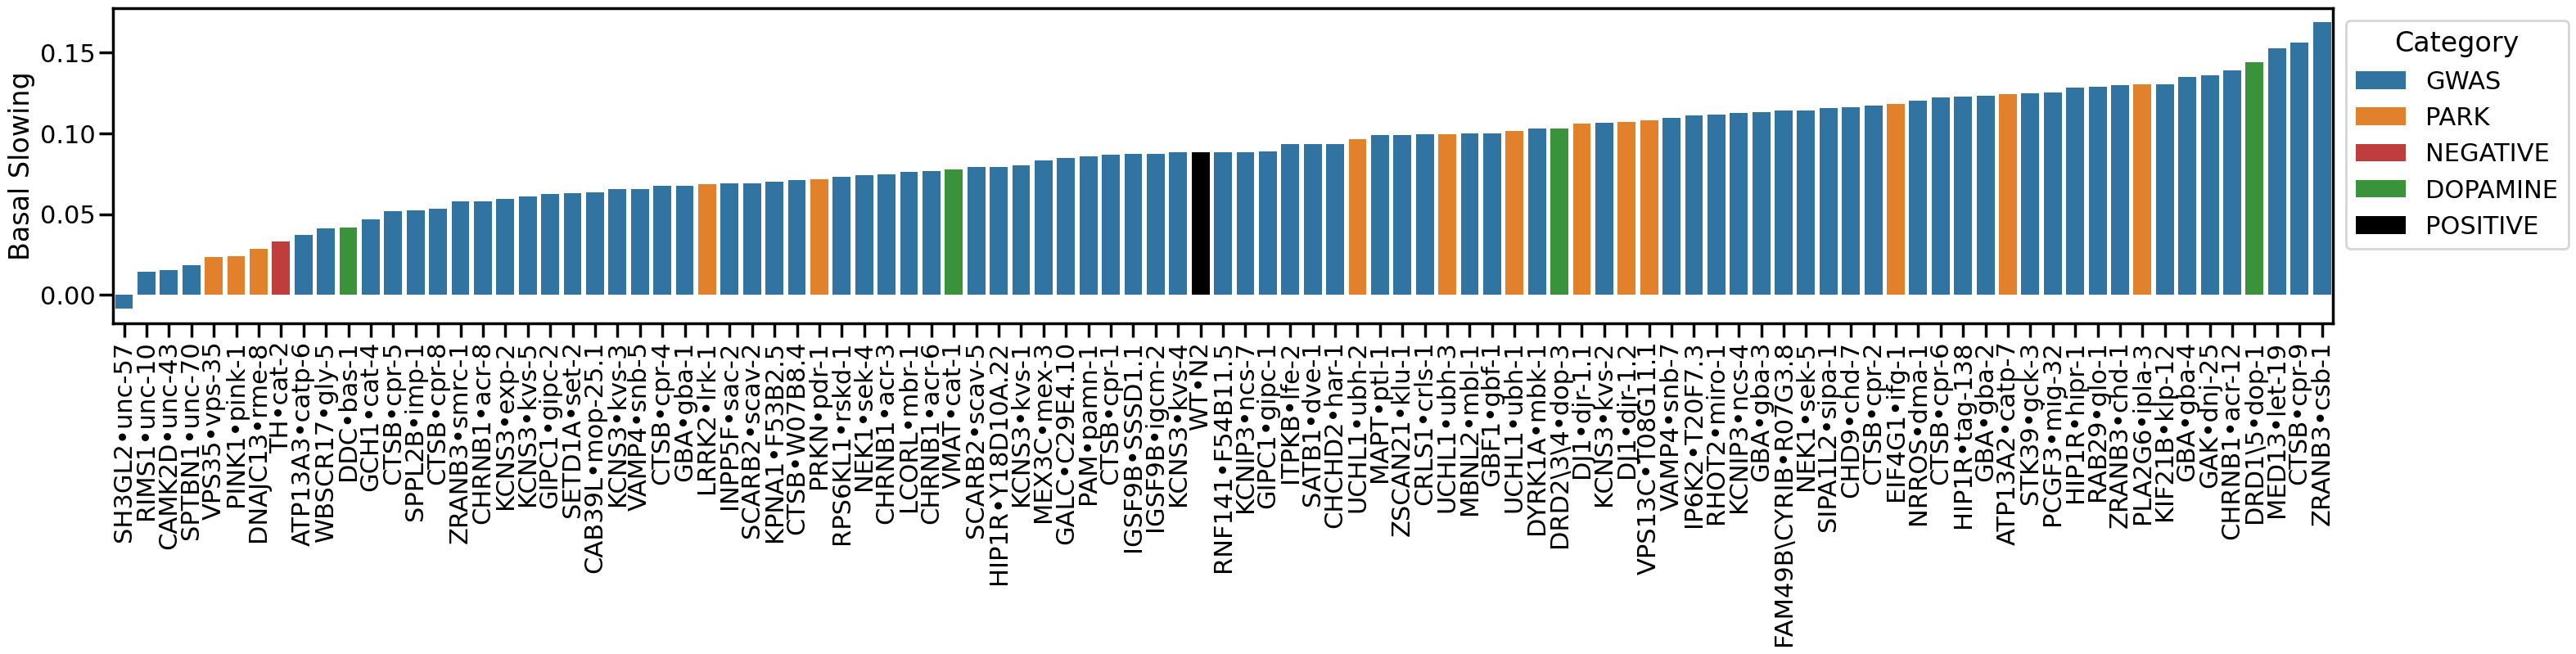

In [362]:
Title = "Basal Slowing (Speed Off Food - Speed On Food), mm/s" #<---------------- Input Here -----------------
FileName = "BSR Screen"
sns.set_context("poster")
plt.figure(linewidth = 1)
plt.figure(figsize=(35, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Gene", 
                 y = 'speed', 
                 data = speed_diff_orthology.sort_values(by=['speed']), #<--------------- Input Here -------------
             # color = 'CornflowerBlue',
                 hue = 'Category',
                 palette = [sns.color_palette()[0],sns.color_palette()[1],sns.color_palette()[3],sns.color_palette()[2],'black'],
                 # legend = False
             # edgecolor="DodgerBlue",
             # linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("")
plt.xticks(rotation=90)
plt.ylabel("Basal Slowing")
# plt.ylim(top = 0.2)
# plt.ylim(bottom = -0.03)
plt.title("")
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'/Users/Joseph/Desktop/{FileName}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [71]:
print(len(speed_diff_orthology['Human Gene'].unique()))

69


# Now For The Rest Of The Behavioural Features

print(speed_diff_orthology)
speed_diff_orthology.to_csv('/Users/Joseph/Desktop/BSRScreen_SpeedDiffs_Orthology.csv')

In [76]:
print(BSR_Data)

                          Group          Genotype Treatment      Gene  \
0      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)   OffFood  C29E4.10   
1      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)   OffFood  C29E4.10   
2      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)   OffFood  C29E4.10   
3      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)   OffFood  C29E4.10   
4      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)   OffFood  C29E4.10   
...                         ...               ...       ...       ...   
52807     vps-35(ok1880)_OnFood    vps-35(ok1880)    OnFood    vps-35   
52808     vps-35(ok1880)_OnFood    vps-35(ok1880)    OnFood    vps-35   
52809     vps-35(ok1880)_OnFood    vps-35(ok1880)    OnFood    vps-35   
52810     vps-35(ok1880)_OnFood    vps-35(ok1880)    OnFood    vps-35   
52811     vps-35(ok1880)_OnFood    vps-35(ok1880)    OnFood    vps-35   

       plate_id      date  worm  time_bin        time     speed          x  \
0         90842  20240815     2     362.0  36

In [105]:
behavioural_phenotypes = ['speed', 'angularspeed', 'bias', 'curve', 'crab', 'kink']
def differences(df):
    all_scores = pd.DataFrame(df.Gene.unique(), columns = ['Gene'])
    for parameter in behavioural_phenotypes:
        worm_avg_parameter = df[['Gene', 'Treatment', parameter]]
        avg_parameter = worm_avg_parameter.groupby(['Treatment', 'Gene'], as_index=False).mean()
        print(avg_parameter)
        print("-"*50)
        parameter_diff = avg_parameter.drop(columns=["Treatment"]).groupby("Gene", as_index=False).diff(periods=-1).dropna()
        print(parameter_diff)
        parameter_diff.insert(loc=0, column='Gene', value = avg_parameter['Gene'].unique())
        parameter_diff.reset_index(drop=True)
        print("-"*50)
        print(parameter_diff)
        # print(parameter_diff)
        # print(parameter_diff.iloc[0,1])
        # parameter_diff = parameter_diff.sort_values(by = ["Score"])
        # # parameter_diff = parameter_diff.drop(columns = [parameter])
        # parameter_diff = parameter_diff.rename(columns = {'Score':parameter})
        # parameter_diff = parameter_diff.reset_index(drop = True)
        print(parameter_diff)
        print(all_scores)
        all_scores = all_scores.merge(parameter_diff,on="Gene",how='left',validate="1:1")
    all_scores = all_scores.set_index("Gene")
    return(all_scores)

In [122]:
BSR_Differences = differences(BSR_Data)
print(BSR_Differences)

    Treatment      Gene     speed
0     OffFood  C29E4.10  0.225740
1     OffFood   F53B2.5  0.123559
2     OffFood  F54B11.5  0.194966
3     OffFood        N2  0.214950
4     OffFood   R07G3.8  0.161423
..        ...       ...       ...
193    OnFood    unc-10  0.056503
194    OnFood    unc-43  0.090512
195    OnFood    unc-57  0.030208
196    OnFood    unc-70  0.055663
197    OnFood    vps-35  0.051642

[198 rows x 3 columns]
--------------------------------------------------
       speed
0   0.084863
1   0.070215
2   0.088286
3   0.088201
4   0.113898
..       ...
94  0.014218
95  0.015082
96 -0.008624
97  0.018503
98  0.023371

[99 rows x 1 columns]
--------------------------------------------------
        Gene     speed
0   C29E4.10  0.084863
1    F53B2.5  0.070215
2   F54B11.5  0.088286
3         N2  0.088201
4    R07G3.8  0.113898
..       ...       ...
94    unc-10  0.014218
95    unc-43  0.015082
96    unc-57 -0.008624
97    unc-70  0.018503
98    vps-35  0.023371

[99 rows x

In [123]:
BSR_Differences = BSR_Differences.reset_index(drop=False)
BSR_Differences

Diff_orthology=pd.merge(BSR_Differences,
                     Gene_Orthology,
                     on='Gene',
                     how='left')

print(Diff_orthology)
Diff_orthology=Diff_orthology.rename(columns={"Gene":"Worm Gene", "Orthology":"Gene"})
print(Diff_orthology)
print("-"*50)
print(Diff_orthology[Diff_orthology['Gene'].isna()])

         Gene     speed  angularspeed      bias     curve      crab  \
0    C29E4.10  0.084863      5.068528 -0.115822  1.063743  0.010529   
1     F53B2.5  0.070215     10.580215 -0.154711  6.811138  0.009557   
2    F54B11.5  0.088286      8.502814 -0.231334  2.844587  0.013119   
3          N2  0.088201      6.980032 -0.137501  3.292361  0.010920   
4     R07G3.8  0.113898      6.439586  0.446815  3.804670  0.007915   
..        ...       ...           ...       ...       ...       ...   
96     unc-10  0.014218      4.920647 -0.100374  2.226228  0.004408   
97     unc-43  0.015082      6.885282 -0.141185  4.796771  0.005962   
98     unc-57 -0.008624     -0.048969 -0.188590  0.664176 -0.000868   
99     unc-70  0.018503      4.528399  0.089108  0.732860  0.005355   
100    vps-35  0.023371      2.101934  0.022438  2.854372  0.002442   

          kink             Orthology    Human Gene  Category  
0     1.442701         GALC•C29E4.10          GALC      GWAS  
1    15.253227       

In [124]:
Diff_orthology.to_csv('/Users/Joseph/Desktop/BSRScreen_Diffs_Orthology.csv')

# T-Tests For Features

In [125]:
BSR_Data

,Group,Genotype,Treatment,Gene,plate_id,date,worm,time_bin,time,speed,x,y,angularspeed,pathlength,kink,bias,curve,dir,crab,length,midline,width,morphwidth,area,Allele
0,C29E4.10(ok2752)_OffFood,C29E4.10(ok2752),OffFood,C29E4.10,90842,20240815,2,362.0,361.497837,0.216780,23.739081,31.837911,12.340918,2.265208,59.659527,0.555807,35.919010,0.002219,0.024609,0.974126,1.226183,0.287691,0.123186,0.140534,ok2752
1,C29E4.10(ok2752)_OffFood,C29E4.10(ok2752),OffFood,C29E4.10,90842,20240815,3,319.5,319.003003,0.198285,14.734667,47.567764,13.402628,6.605844,58.006378,0.977679,38.539116,0.003824,0.026216,1.033487,1.295890,0.302002,0.129382,0.148725,ok2752
2,C29E4.10(ok2752)_OffFood,C29E4.10(ok2752),OffFood,C29E4.10,90842,20240815,13,395.5,395.011394,0.213610,22.991654,42.433511,14.726721,1.046752,58.586022,1.000000,38.962963,0.000917,0.030576,1.003890,1.273466,0.317195,0.136351,0.142743,ok2752
3,C29E4.10(ok2752)_OffFood,C29E4.10(ok2752),OffFood,C29E4.10,90842,20240815,14,302.5,301.981691,0.224755,43.579099,37.484400,14.386366,12.909921,55.507687,0.961538,41.571123,0.000574,0.034272,0.934712,1.182566,0.284480,0.149332,0.152765,ok2752
4,C29E4.10(ok2752)_OffFood,C29E4.10(ok2752),OffFood,C29E4.10,90842,20240815,17,322.0,321.505312,0.265168,22.113133,43.969759,13.815320,3.552500,48.547745,0.989418,34.715602,0.000787,0.033891,1.045385,1.280736,0.292197,0.125675,0.144789,ok2752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52807,vps-35(ok1880)_OnFood,vps-35(ok1880),OnFood,vps-35,124222,20220818,227,350.0,349.500164,0.112387,14.777099,32.218514,9.962774,3.872338,46.724396,0.540142,28.958899,0.012166,0.012061,0.651331,0.757265,0.161734,0.097091,0.072717,ok1880
52808,vps-35(ok1880)_OnFood,vps-35(ok1880),OnFood,vps-35,124222,20220818,230,312.5,311.981809,0.113788,27.417792,27.622298,7.854383,6.436110,37.466544,0.962525,28.725660,0.000256,0.010754,0.620248,0.706402,0.127874,0.092289,0.062669,ok1880
52809,vps-35(ok1880)_OnFood,vps-35(ok1880),OnFood,vps-35,124222,20220818,231,350.0,349.499231,0.140467,19.585637,37.259483,8.729077,7.434440,42.652253,0.822544,26.793408,0.005927,0.011807,0.701585,0.842681,0.184350,0.118245,0.096817,ok1880
52810,vps-35(ok1880)_OnFood,vps-35(ok1880),OnFood,vps-35,124222,20220818,232,350.0,349.501414,0.137325,18.676353,39.583079,6.076780,8.626435,40.045113,0.936672,29.103406,0.005324,0.011388,0.832635,0.954598,0.184953,0.119382,0.114609,ok1880


In [127]:
list = BSR_Data["Gene"].unique()
print(list)
print(len(list))

['C29E4.10' 'F53B2.5' 'F54B11.5' 'N2' 'R07G3.8' 'SSSD1.1' 'T08G11.1'
 'T20F7.3' 'W07B8.4' 'Y18D10A.22' 'acr-12' 'acr-3' 'acr-6' 'acr-8' 'bas-1'
 'cat-1' 'cat-2' 'cat-4' 'catp-6' 'catp-7' 'chd-1' 'chd-7' 'cpr-1' 'cpr-2'
 'cpr-4' 'cpr-5' 'cpr-6' 'cpr-8' 'cpr-9' 'crls-1' 'csb-1' 'djr-1.1'
 'djr-1.2' 'dma-1' 'dnj-25' 'dop-1' 'dop-3' 'dve-1' 'exp-2' 'gba-1'
 'gba-2' 'gba-3' 'gba-4' 'gbf-1' 'gck-3' 'gipc-1' 'gipc-2' 'glo-1' 'gly-5'
 'har-1' 'hipr-1' 'ifg-1' 'igcm-2' 'imp-1' 'ipla-3' 'klp-12' 'klu-1'
 'kvs-1' 'kvs-2' 'kvs-3' 'kvs-4' 'kvs-5' 'let-19' 'lfe-2' 'lrk-1' 'mbk-1'
 'mbl-1' 'mbr-1' 'mex-3' 'mig-32' 'miro-1' 'mop-25.1' 'ncs-4' 'ncs-7'
 'pamn-1' 'pdr-1' 'pink-1' 'ptl-1' 'rme-8' 'rskd-1' 'sac-2' 'scav-2'
 'scav-5' 'sek-4' 'sek-5' 'set-2' 'sipa-1' 'smrc-1' 'snb-5' 'snb-7'
 'tag-138' 'ubh-1' 'ubh-2' 'ubh-3' 'unc-10' 'unc-43' 'unc-57' 'unc-70'
 'vps-35']
99


In [164]:
BSR_Data_OffFood = BSR_Data[BSR_Data["Treatment"] == "OffFood"].dropna().add_suffix('_OffFood',1)
BSR_Data_OffFood = BSR_Data_OffFood.rename(columns = {'Genotype_OffFood': 'Genotype',
                                                     'Gene_OffFood': 'Gene',
                                                     'Group_OffFood': 'Group',
                                                     'Treatment_OffFood': 'Treatment'},)
print(BSR_Data_OffFood)
print("-"*50)

BSR_Data_OnFood = BSR_Data[BSR_Data["Treatment"] == "OnFood"].dropna().add_suffix('_OnFood',1)
BSR_Data_OnFood = BSR_Data_OnFood.rename(columns = {'Genotype_OnFood': 'Genotype',
                                                    'Gene_OnFood': 'Gene',
                                                    'Group_OnFood': 'Group',
                                                    'Treatment_OnFood': 'Treatment'})
print(BSR_Data_OnFood)

                          Group          Genotype Treatment      Gene  \
0      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)   OffFood  C29E4.10   
1      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)   OffFood  C29E4.10   
2      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)   OffFood  C29E4.10   
3      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)   OffFood  C29E4.10   
4      C29E4.10(ok2752)_OffFood  C29E4.10(ok2752)   OffFood  C29E4.10   
...                         ...               ...       ...       ...   
52708    vps-35(ok1880)_OffFood    vps-35(ok1880)   OffFood    vps-35   
52709    vps-35(ok1880)_OffFood    vps-35(ok1880)   OffFood    vps-35   
52710    vps-35(ok1880)_OffFood    vps-35(ok1880)   OffFood    vps-35   
52711    vps-35(ok1880)_OffFood    vps-35(ok1880)   OffFood    vps-35   
52712    vps-35(ok1880)_OffFood    vps-35(ok1880)   OffFood    vps-35   

       plate_id_OffFood  date_OffFood  worm_OffFood  time_bin_OffFood  \
0                 90842      20240815             

In [171]:
PD_gene_baseline_length_T = pd.DataFrame(columns = ["Gene", "length"])
PD_gene_baseline_midline_T = pd.DataFrame(columns = ["Gene", "midline"])
PD_gene_baseline_width_T = pd.DataFrame(columns = ["Gene", "width"])
PD_gene_baseline_morphwidth_T = pd.DataFrame(columns = ["Gene", "morphwidth"])
PD_gene_baseline_area_T = pd.DataFrame(columns = ["Gene", "area"])

PD_gene_baseline_speed_T_OffFood = pd.DataFrame(columns = ["Gene", "speed_OffFood"])
PD_gene_baseline_angularspeed_T_OffFood = pd.DataFrame(columns = ["Gene", "angularspeed_OffFood"])
PD_gene_baseline_bias_T_OffFood = pd.DataFrame(columns = ["Gene", "bias_OffFood"])
PD_gene_baseline_curve_T_OffFood = pd.DataFrame(columns = ["Gene", "curve_OffFood"])
PD_gene_baseline_crab_T_OffFood = pd.DataFrame(columns = ["Gene", "crab_OffFood"])
PD_gene_baseline_kink_T_OffFood = pd.DataFrame(columns = ["Gene", "kink_OffFood"])

PD_gene_baseline_speed_T_OnFood = pd.DataFrame(columns = ["Gene", "speed_OnFood"])
PD_gene_baseline_angularspeed_T_OnFood = pd.DataFrame(columns = ["Gene", "angularspeed_OnFood"])
PD_gene_baseline_bias_T_OnFood = pd.DataFrame(columns = ["Gene", "bias_OnFood"])
PD_gene_baseline_curve_T_OnFood = pd.DataFrame(columns = ["Gene", "curve_OnFood"])
PD_gene_baseline_crab_T_OnFood = pd.DataFrame(columns = ["Gene", "crab_OnFood"])
PD_gene_baseline_kink_T_OnFood = pd.DataFrame(columns = ["Gene", "kink_OnFood"])

In [172]:
def TTest_Gene(DatasetList, Type, DF_ref, output):
    for a in DatasetList:
        Tstat = ttest(DF_ref[DF_ref.Gene == a][Type], DF_ref[DF_ref.Gene == "N2"][Type], paired=False,correction='auto')['T'].iloc[0]
        row = [a, Tstat]
        output.loc[len(output)] = row
    print(output)

In [173]:
TTest_Gene(BSR_Data["Gene"].unique(), "length", BSR_Data, PD_gene_baseline_length_T)
TTest_Gene(BSR_Data["Gene"].unique(), "midline", BSR_Data, PD_gene_baseline_midline_T)
TTest_Gene(BSR_Data["Gene"].unique(), "width", BSR_Data, PD_gene_baseline_width_T)
TTest_Gene(BSR_Data["Gene"].unique(), "morphwidth", BSR_Data, PD_gene_baseline_morphwidth_T)
TTest_Gene(BSR_Data["Gene"].unique(), "area", BSR_Data, PD_gene_baseline_area_T)

TTest_Gene(BSR_Data["Gene"].unique(), "speed_OffFood",
           BSR_Data_OffFood, PD_gene_baseline_speed_T_OffFood)
TTest_Gene(BSR_Data["Gene"].unique(), "angularspeed_OffFood",
           BSR_Data_OffFood, PD_gene_baseline_angularspeed_T_OffFood)
TTest_Gene(BSR_Data["Gene"].unique(), "bias_OffFood",
           BSR_Data_OffFood, PD_gene_baseline_bias_T_OffFood)
TTest_Gene(BSR_Data["Gene"].unique(), "curve_OffFood",
           BSR_Data_OffFood, PD_gene_baseline_curve_T_OffFood)
TTest_Gene(BSR_Data["Gene"].unique(), "crab_OffFood",
           BSR_Data_OffFood, PD_gene_baseline_crab_T_OffFood)
TTest_Gene(BSR_Data["Gene"].unique(), "kink_OffFood",
           BSR_Data_OffFood, PD_gene_baseline_kink_T_OffFood)

TTest_Gene(BSR_Data["Gene"].unique(), "speed_OnFood",
           BSR_Data_OnFood, PD_gene_baseline_speed_T_OnFood)
TTest_Gene(BSR_Data["Gene"].unique(), "angularspeed_OnFood",
           BSR_Data_OnFood, PD_gene_baseline_angularspeed_T_OnFood)
TTest_Gene(BSR_Data["Gene"].unique(), "bias_OnFood",
           BSR_Data_OnFood, PD_gene_baseline_bias_T_OnFood)
TTest_Gene(BSR_Data["Gene"].unique(), "curve_OnFood",
           BSR_Data_OnFood, PD_gene_baseline_curve_T_OnFood)
TTest_Gene(BSR_Data["Gene"].unique(), "crab_OnFood",
           BSR_Data_OnFood, PD_gene_baseline_crab_T_OnFood)
TTest_Gene(BSR_Data["Gene"].unique(), "kink_OnFood",
           BSR_Data_OnFood, PD_gene_baseline_kink_T_OnFood)

        Gene     length
0   C29E4.10   9.308031
1    F53B2.5  -7.592101
2   F54B11.5  -2.533290
3         N2   0.000000
4    R07G3.8  -0.566893
..       ...        ...
94    unc-10 -53.051147
95    unc-43 -39.725830
96    unc-57 -28.019187
97    unc-70 -71.898531
98    vps-35 -18.944385

[99 rows x 2 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pingouin/bayesian.py:154: RuntimeWarning: overflow encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


        Gene    midline
0   C29E4.10  16.978750
1    F53B2.5 -10.693100
2   F54B11.5  -0.217389
3         N2   0.000000
4    R07G3.8  -8.911151
..       ...        ...
94    unc-10 -47.604661
95    unc-43 -37.701265
96    unc-57 -31.677297
97    unc-70 -53.651222
98    vps-35 -25.563684

[99 rows x 2 columns]
        Gene      width
0   C29E4.10  16.051432
1    F53B2.5  -3.999999
2   F54B11.5   3.006087
3         N2   0.000000
4    R07G3.8 -14.327967
..       ...        ...
94    unc-10   5.158839
95    unc-43   0.133151
96    unc-57 -16.491433
97    unc-70   4.555853
98    vps-35 -22.333735

[99 rows x 2 columns]
        Gene  morphwidth
0   C29E4.10   10.506832
1    F53B2.5    3.304305
2   F54B11.5   -5.275870
3         N2    0.000000
4    R07G3.8   -0.764679
..       ...         ...
94    unc-10    1.565006
95    unc-43  -10.784363
96    unc-57   -6.398484
97    unc-70   23.336118
98    vps-35  -25.630426

[99 rows x 2 columns]
        Gene       area
0   C29E4.10  15.908789
1    F5

In [150]:
print(BSR_Data["Gene"].unique())
print(BSR_Data[BSR_Data.Gene == "N2"]["length"])

['C29E4.10' 'F53B2.5' 'F54B11.5' 'N2' 'R07G3.8' 'SSSD1.1' 'T08G11.1'
 'T20F7.3' 'W07B8.4' 'Y18D10A.22' 'acr-12' 'acr-3' 'acr-6' 'acr-8' 'bas-1'
 'cat-1' 'cat-2' 'cat-4' 'catp-6' 'catp-7' 'chd-1' 'chd-7' 'cpr-1' 'cpr-2'
 'cpr-4' 'cpr-5' 'cpr-6' 'cpr-8' 'cpr-9' 'crls-1' 'csb-1' 'djr-1.1'
 'djr-1.2' 'dma-1' 'dnj-25' 'dop-1' 'dop-3' 'dve-1' 'exp-2' 'gba-1'
 'gba-2' 'gba-3' 'gba-4' 'gbf-1' 'gck-3' 'gipc-1' 'gipc-2' 'glo-1' 'gly-5'
 'har-1' 'hipr-1' 'ifg-1' 'igcm-2' 'imp-1' 'ipla-3' 'klp-12' 'klu-1'
 'kvs-1' 'kvs-2' 'kvs-3' 'kvs-4' 'kvs-5' 'let-19' 'lfe-2' 'lrk-1' 'mbk-1'
 'mbl-1' 'mbr-1' 'mex-3' 'mig-32' 'miro-1' 'mop-25.1' 'ncs-4' 'ncs-7'
 'pamn-1' 'pdr-1' 'pink-1' 'ptl-1' 'rme-8' 'rskd-1' 'sac-2' 'scav-2'
 'scav-5' 'sek-4' 'sek-5' 'set-2' 'sipa-1' 'smrc-1' 'snb-5' 'snb-7'
 'tag-138' 'ubh-1' 'ubh-2' 'ubh-3' 'unc-10' 'unc-43' 'unc-57' 'unc-70'
 'vps-35']
1314    0.877519
1315    0.873856
1316    1.046160
1317    0.757598
1318    0.925854
          ...   
1952    0.946353
1953    0.974290
19

In [175]:
PD_gene_baseline_Tstats = PD_gene_baseline_length_T
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_midline_T, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_width_T, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_morphwidth_T, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_area_T, on='Gene',how='left')

PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_speed_T_OffFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_angularspeed_T_OffFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_bias_T_OffFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_curve_T_OffFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_crab_T_OffFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_kink_T_OffFood, on='Gene',how='left')

PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_speed_T_OnFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_angularspeed_T_OnFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_bias_T_OnFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_curve_T_OnFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_crab_T_OnFood, on='Gene',how='left')
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.merge(PD_gene_baseline_kink_T_OnFood, on='Gene',how='left')

PD_BSR_Screen_Tstats = PD_gene_baseline_Tstats.set_index("Gene")
print(PD_BSR_Screen_Tstats)

             length    midline      width  morphwidth       area  \
Gene                                                               
C29E4.10   9.308031  16.978750  16.051432   10.506832  15.908789   
F53B2.5   -7.592101 -10.693100  -3.999999    3.304305  -1.542430   
F54B11.5  -2.533290  -0.217389   3.006087   -5.275870  -5.682095   
N2         0.000000   0.000000   0.000000    0.000000   0.000000   
R07G3.8   -0.566893  -8.911151 -14.327967   -0.764679  -0.900159   
...             ...        ...        ...         ...        ...   
unc-10   -53.051147 -47.604661   5.158839    1.565006 -36.897000   
unc-43   -39.725830 -37.701265   0.133151  -10.784363 -38.276111   
unc-57   -28.019187 -31.677297 -16.491433   -6.398484 -42.663804   
unc-70   -71.898531 -53.651222   4.555853   23.336118 -30.821630   
vps-35   -18.944385 -25.563684 -22.333735  -25.630426 -32.137121   

          speed_OffFood  angularspeed_OffFood  bias_OffFood  curve_OffFood  \
Gene                                 

In [179]:
PD_gene_baseline_Tstats = PD_BSR_Screen_Tstats.dropna().sort_index()

PD_gene_baseline_Tstats_standardize = (PD_gene_baseline_Tstats - PD_gene_baseline_Tstats.mean())/PD_gene_baseline_Tstats.std()
print(PD_gene_baseline_Tstats_standardize)

PD_gene_baseline_Tstats_normalize = PD_gene_baseline_Tstats_standardize - PD_gene_baseline_Tstats_standardize[PD_gene_baseline_Tstats_standardize.index == 'N2'].squeeze()
PD_gene_baseline_Tstats_normalize = PD_gene_baseline_Tstats_normalize.drop(index = 'N2').reset_index(drop=False)
print(PD_gene_baseline_Tstats_normalize)

            length   midline     width  morphwidth      area  speed_OffFood  \
Gene                                                                          
C29E4.10  1.324145  2.056447  2.507473    1.466610  1.810601       1.384342   
F53B2.5   0.172143  0.229237  0.503996    0.862237  0.715141       0.353859   
F54B11.5  0.516978  0.920962  1.204023    0.142263  0.455283       0.642373   
N2        0.689661  0.935317  0.903664    0.584968  0.811963       1.111231   
R07G3.8   0.651018  0.346902 -0.527943    0.520803  0.755458      -0.119770   
...            ...       ...       ...         ...       ...            ...   
unc-10   -2.926586 -2.208083  1.419119    0.716290 -1.504162      -3.420377   
unc-43   -2.018262 -1.554148  0.916968   -0.319961 -1.590732      -1.573083   
unc-57   -1.220275 -1.156377 -0.744109    0.048064 -1.866160      -2.872167   
unc-70   -4.211323 -2.607345  1.358871    2.543131 -1.122794      -2.164394   
vps-35   -0.601689 -0.752687 -1.327854   -1.565713 -

In [363]:
BSR_Tstat_orthology=pd.merge(PD_gene_baseline_Tstats_normalize,
                     Gene_Orthology,
                     on='Gene',
                     how='left')

BSR_Tstat_orthology=BSR_Tstat_orthology.rename(columns={"Gene":"Worm Gene", "Orthology":"Gene"})
print(BSR_Tstat_orthology)
print("-"*50)
print(BSR_Tstat_orthology[BSR_Tstat_orthology['Gene'].isna()])

   Worm Gene    length   midline     width  morphwidth      area  \
0   C29E4.10  0.634485  1.121130  1.603810    0.881641  0.998638   
1    F53B2.5 -0.517518 -0.706080 -0.399668    0.277268 -0.096823   
2   F54B11.5 -0.172682 -0.014354  0.300359   -0.442705 -0.356680   
3    R07G3.8 -0.038642 -0.588415 -1.431606   -0.064165 -0.056505   
4    SSSD1.1 -1.040278 -1.190799 -0.172335    0.403513 -0.434767   
..       ...       ...       ...       ...         ...       ...   
95    unc-10 -3.616246 -3.143400  0.515455    0.131322 -2.316125   
96    unc-43 -2.707922 -2.489465  0.013304   -0.904929 -2.402695   
97    unc-57 -1.909936 -2.091694 -1.647773   -0.536905 -2.678123   
98    unc-70 -4.900984 -3.542662  0.455207    1.958163 -1.934757   
99    vps-35 -1.291349 -1.688004 -2.231518   -2.150681 -2.017334   

    speed_OffFood  angularspeed_OffFood  bias_OffFood  curve_OffFood  \
0        0.273111              0.295920      0.315949       0.277606   
1       -0.757372             -0.076246

In [364]:
BSR_Tstat_orthology.drop_duplicates().to_csv('/Users/Joseph/Desktop/BSRScreen_Tstats_Orthology.csv')

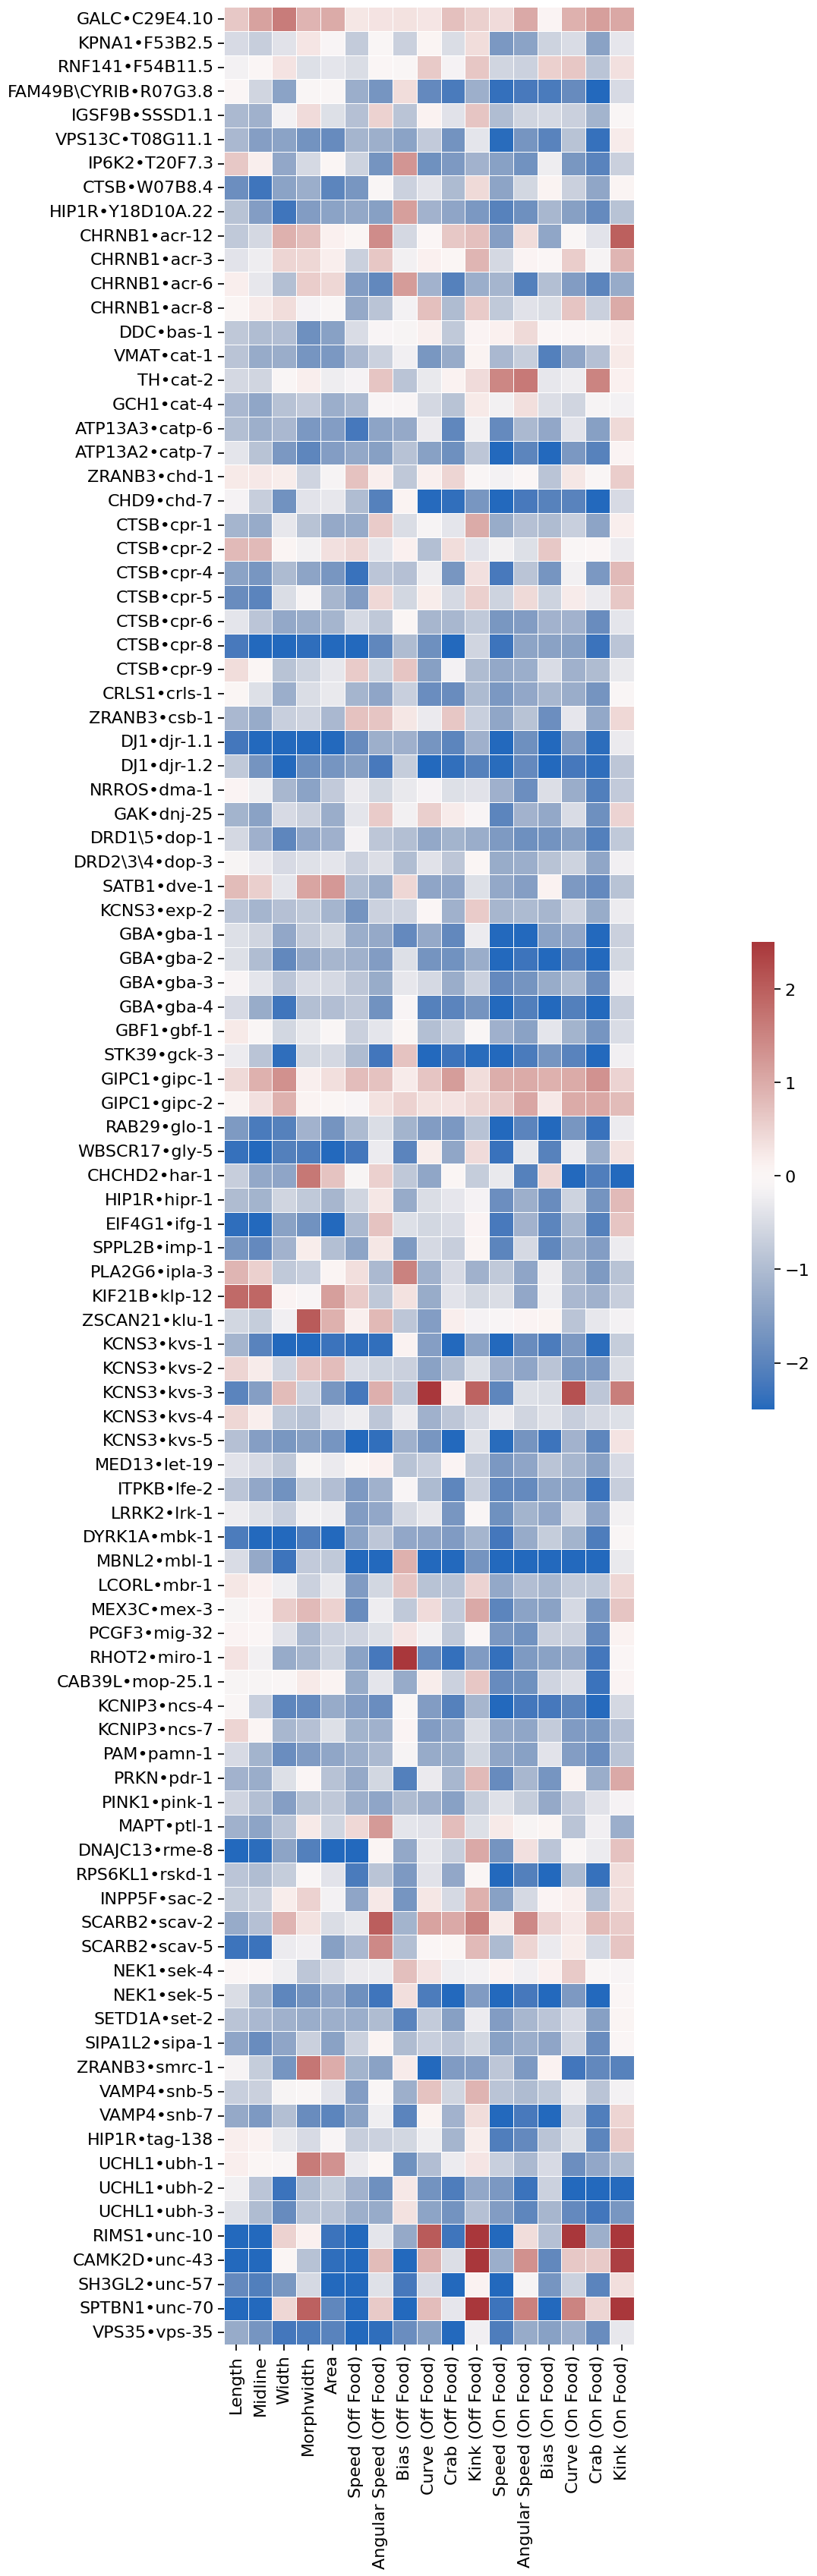

In [365]:
sns.set_context('notebook')
plt.figure(figsize = (40,40))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
ax = sns.heatmap(data = BSR_Tstat_orthology.set_index('Gene').drop(columns=['Worm Gene','Human Gene','Category']).drop_duplicates(), 
                 annot = False, 
                 linewidth = 0.5, 
                 square = True, 
                 cmap = "vlag", 
                 center = 0, 
                 vmax = 2.5,
                 vmin = -2.5, 
                 # xticklabels = 1,
                 xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                                'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                                'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                                'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                                'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)'],
                 yticklabels = 1,
                 cbar_kws = {"shrink": .2,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('', fontsize = 24)
ax.set_xlabel('', fontsize = 24)
# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
plt.savefig('/Users/Joseph/Desktop/BSRScreen_GENE_heatmap.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

In [366]:
BSR_Tstat_orthology_cluster = BSR_Tstat_orthology.replace('NEGATIVE','DOPAMINE').drop(columns=['Human Gene','Worm Gene'])
print(BSR_Tstat_orthology_cluster.Category.unique())

['GWAS' 'PARK' 'DOPAMINE']


In [367]:
colours = ['grey',sns.color_palette()[1],sns.color_palette()[2]]

In [368]:
BSR_Tstat_orthology_cluster.Category.unique()

array(['GWAS', 'PARK', 'DOPAMINE'], dtype=object)

In [369]:
Gene = BSR_Tstat_orthology_cluster.pop("Gene")
Category = BSR_Tstat_orthology_cluster.pop("Category")
lut = dict(zip(tuple(Category.unique()),colours))
print(lut)
row_colors = Category.map(lut)

{'GWAS': 'grey', 'PARK': (1.0, 0.4980392156862745, 0.054901960784313725), 'DOPAMINE': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)}


In [370]:
BSR_Tstat_orthology_cluster

,length,midline,width,morphwidth,area,speed_OffFood,angularspeed_OffFood,bias_OffFood,curve_OffFood,crab_OffFood,kink_OffFood,speed_OnFood,angularspeed_OnFood,bias_OnFood,curve_OnFood,crab_OnFood,kink_OnFood
0,0.634485,1.121130,1.603810,0.881641,0.998638,0.273111,0.295920,0.315949,0.277606,0.739760,0.535126,0.406565,1.016251,0.063166,0.925641,1.160049,1.045285
1,-0.517518,-0.706080,-0.399668,0.277268,-0.096823,-0.757372,-0.076246,-0.669248,0.042923,-0.479108,0.371743,-1.624616,-1.430250,-0.642017,-0.491488,-1.447733,-0.340161
2,-0.172682,-0.014354,0.300359,-0.442705,-0.356680,-0.468858,-0.026958,-0.039393,0.607527,-0.142891,0.653731,-0.599689,-0.657301,0.533375,0.662341,-0.859682,0.333505
3,-0.038642,-0.588415,-1.431606,-0.064165,-0.056505,-1.231001,-1.689417,0.383036,-1.905320,-2.173943,-1.217566,-2.365382,-2.188301,-2.183913,-1.872146,-2.519091,-0.523304
4,-1.040278,-1.190799,-0.172335,0.403513,-0.434767,-0.934580,0.518221,-0.874314,0.112916,-0.400789,0.680147,-0.986307,-0.587891,-0.528921,-0.673910,-1.135238,-0.053735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-3.616246,-3.143400,0.515455,0.131322,-2.316125,-4.531608,-0.369370,-1.323293,2.039563,-2.270950,2.769848,-2.521261,0.372039,-0.935488,2.491560,-1.226290,3.235451
96,-2.707922,-2.489465,0.013304,-0.904929,-2.402695,-2.684314,0.796931,-3.743027,0.916859,-0.456262,2.752911,-1.246194,1.339156,-1.914513,0.642680,0.615153,2.389142
97,-1.909936,-2.091694,-1.647773,-0.536905,-2.678123,-3.983398,-0.414528,-2.218983,-0.527155,-3.556848,0.101685,-3.069055,-0.133056,-1.695493,-0.657139,-2.005962,0.370487
98,-4.900984,-3.542662,0.455207,1.958163,-1.934757,-3.275625,0.609441,-4.183951,0.778290,-0.344098,3.240127,-2.285561,1.558352,-3.698916,1.507520,0.486315,4.540904


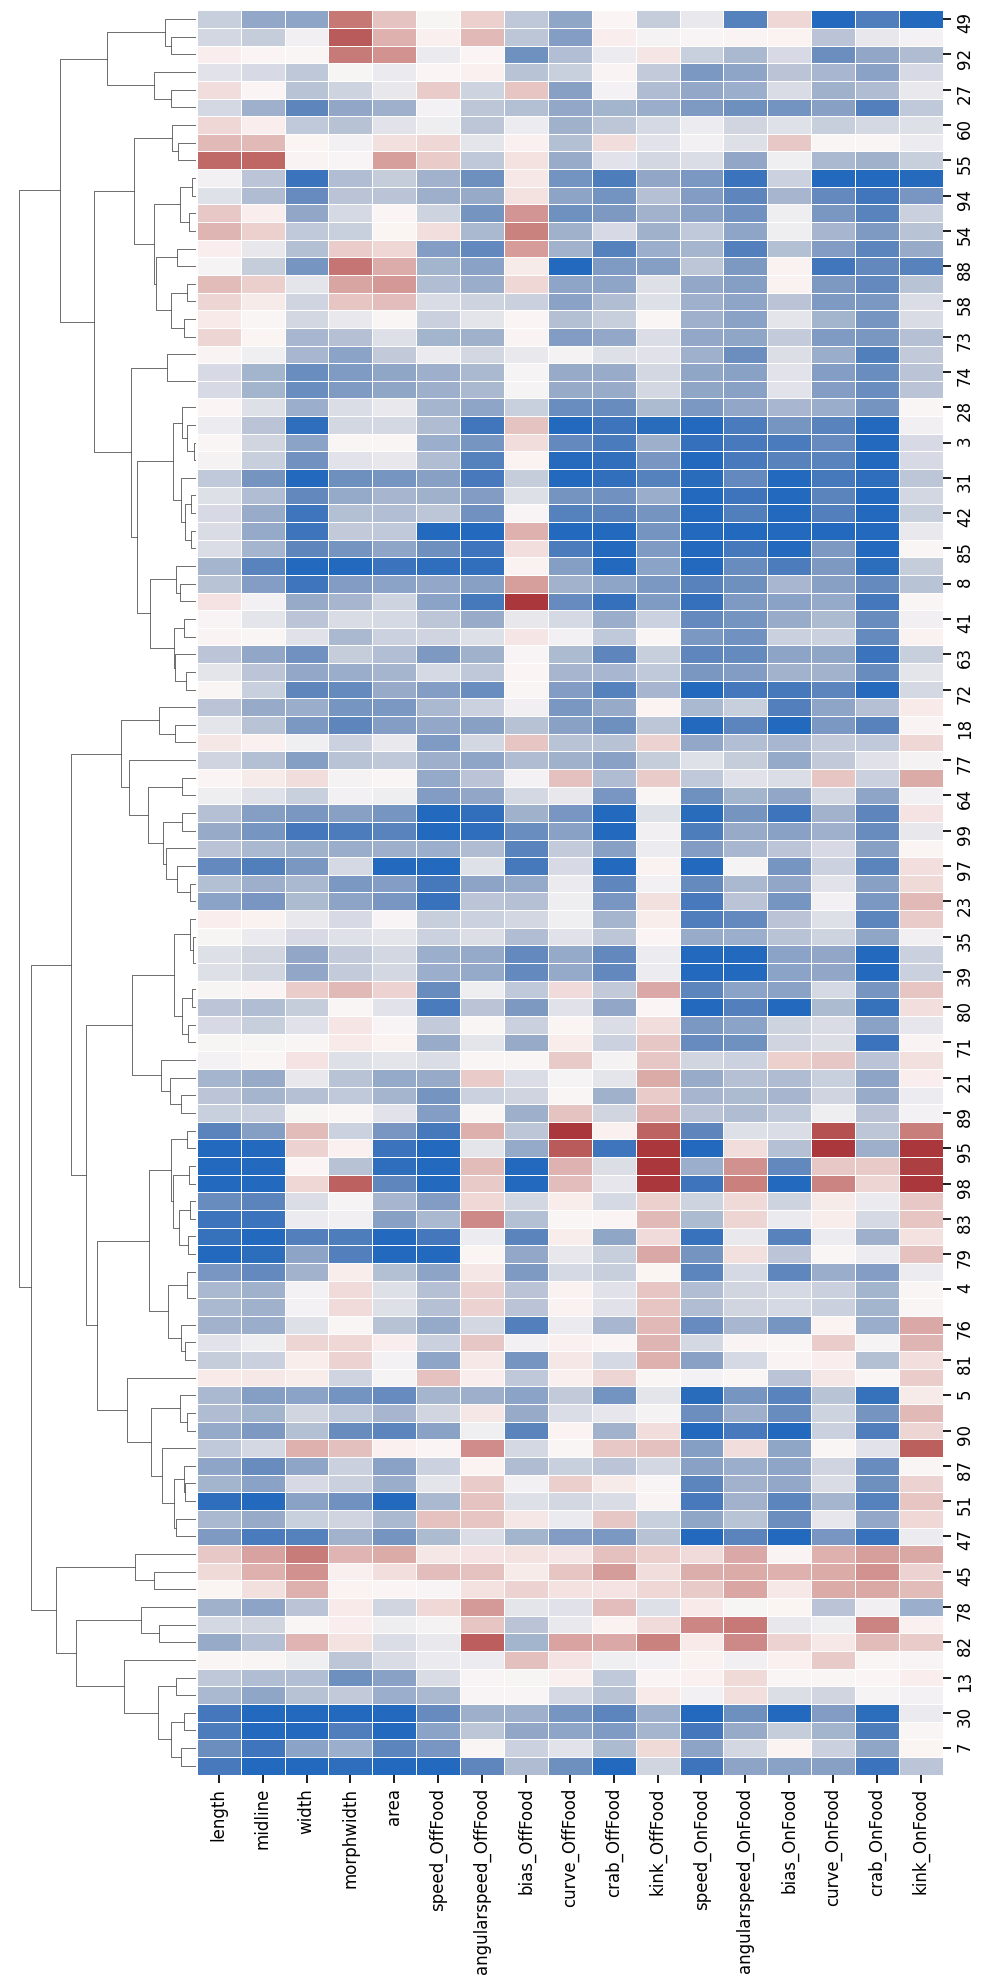

In [374]:
sns.set_context('notebook')
# plt.figure(figsize = (100,70))
plt.rc('xtick', labelsize = 12)
plt.rc('ytick', labelsize = 12) 
ax = sns.clustermap(data = BSR_Tstat_orthology_cluster, 
                    figsize=(10,20),
                    linewidth = 0.5, 
                    cmap = "vlag", 
                    center = 0, 
                    vmax = 2.5,
                    vmin = -2.5, 
                    col_cluster=False,
                    dendrogram_ratio=(0.2,0),
                    cbar_pos=None,
                    metric='correlation',
                    method='complete',
                 # xticklabels = 1,
                    # cbar_kws = {"shrink": .01,
                    #          # "label": "Normalized Behaviour Score"
                    #         }
                   )
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
# plt.savefig('/Users/Joseph/Desktop/BSRScreen_GENE_heatmap.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()

In [375]:
Category_reordered=Category.reindex(ax.dendrogram_row.reordered_ind)
print(Category_reordered)
# print("-"*50)
# print(Category)
lut = dict(zip(tuple(Category.unique()),colours))
# # print(lut)
# # # print("-"*50)
row_colors = Category_reordered.map(lut)
# print(row_colors)

49    GWAS
56    GWAS
92    PARK
62    GWAS
27    GWAS
      ... 
16    GWAS
30    PARK
65    GWAS
7     GWAS
26    GWAS
Name: Category, Length: 100, dtype: object


In [261]:
print(type(Gene))
print(ax.dendrogram_row.reordered_ind)

<class 'pandas.core.series.Series'>
[59, 95, 96, 98, 49, 15, 82, 9, 46, 0, 45, 12, 10, 2, 84, 19, 22, 97, 51, 48, 79, 65, 26, 30, 57, 61, 99, 70, 80, 38, 39, 90, 5, 47, 66, 44, 3, 20, 31, 85, 18, 72, 40, 42, 93, 14, 77, 28, 73, 8, 34, 25, 74, 75, 63, 94, 29, 33, 81, 89, 4, 52, 21, 37, 68, 71, 67, 32, 62, 43, 1, 35, 41, 64, 69, 91, 7, 86, 17, 23, 76, 53, 50, 87, 78, 24, 83, 13, 16, 56, 92, 55, 60, 27, 54, 88, 36, 58, 6, 11]


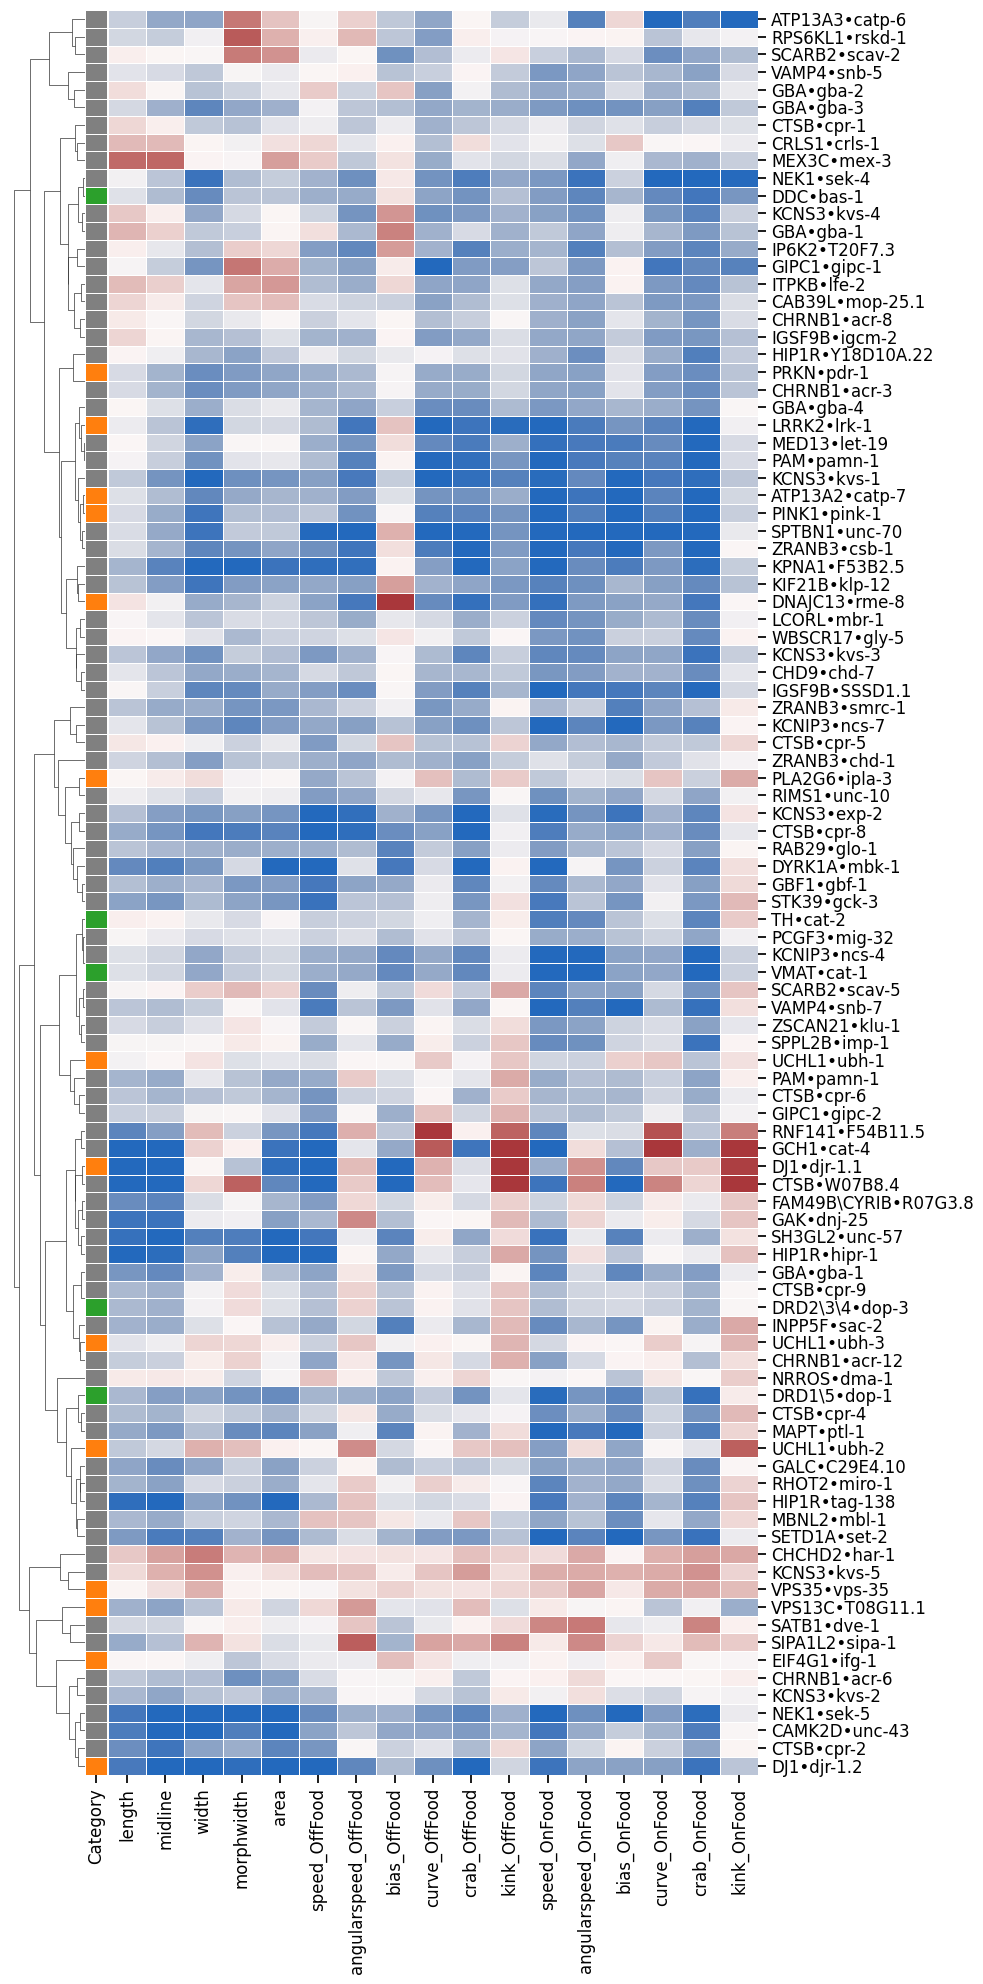

In [379]:
sns.set_context('notebook')
# plt.figure(figsize = (100,70))
plt.rc('xtick', labelsize = 12)
plt.rc('ytick', labelsize = 12) 
ax = sns.clustermap(data = BSR_Tstat_orthology_cluster, 
                    figsize=(10,20),
                    linewidth = 0.5, 
                    cmap = "vlag", 
                    center = 0, 
                    vmax = 2.5,
                    vmin = -2.5, 
                    col_cluster=False,
                    row_colors=row_colors.reset_index().Category,
                    dendrogram_ratio=(0.1,0),
                    cbar_pos=None,
                    yticklabels=Gene.reindex(ax.dendrogram_row.reordered_ind),
                    metric='correlation',
                    method='complete',
                 # xticklabels = 1,
                    # cbar_kws = {"shrink": .01,
                    #          # "label": "Normalized Behaviour Score"
                    #         }
                   )
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
plt.savefig('/Users/Joseph/Desktop/BSRScreen_GENE_clustermap.png', format = 'png', dpi = 450, bbox_inches = "tight")
plt.show()